<a href="https://colab.research.google.com/github/adrianova8/Sampling_Methods/blob/main/S06_T01_Tasca_m%C3%A8todes_de_mostreig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KAGGLE LINK:      

https://www.kaggle.com/mohamedhanyyy/top-football-leagues-scorers

# **DATA SCIENCE ITINERARY - IT ACADEMY**



<div class="alert alert-block alert-info"><font size="6"><center><b><u>Sprint 6. Sampling Methods</u></b><center></font>

\begin{align*}Adrià\:Nova\end{align*}
    
\begin{align*}Data\hspace{2mm}Science\hspace{2mm}Integrator\end{align*}
       
\begin{align*}Date : November\hspace{2mm}2021\end{align*}</div>



<div class="alert alert-block alert-info"><font size="6"><b>S06 T01: Assign Sampling Methods</b></font>




<div class="alert alert-block alert-info"><font size="5"><b>DATA CONTEXT:</b></font>

* The dataset is scraped from many resources, one of them is **INFOGOL**.

* **INFOGOL** has league tables and statistics from some of the top competitions from all around the world.

<div class="alert alert-block alert-info"><font size="5"><b>DATA CONTENT:</b></font>

* This dataset includes top football leagues scorers

<div class="alert alert-block alert-info"><font size="6"><b>Top Football Leagues Scorers Data Set</b></font>

<div class="alert alert-block alert-info"><font size="5"><b>Variables Description:</b></font>

**Country:** The place where the league is played

**League:** The league the player plays in

**Club:** The club the player plays in

**Player Names:** The name's player

**Matches Played:** Number of matches played during a season

**Substitution:** Number of times the player has been replaced

**Mins:** Minutes played during a season

**xG:** A predictive system that is used to evaluate the probability of scoring that a footballer has in each possibility of a goal. The higher the value, the greater the probability of scoring a goal in each goal possibility

**xG Per Avg Match:** Same that xG but the average score per match. The higher value, the better.

**Shots:** Shots during the season

**OnTarget:** Shots during the season on target

**Shots Per Avg Match:** Average shots per match

**On Target Per Avg Match:** Average shots on target per match

**Year:** Year of the season




In [ ]:
# Libraries

!pip install squarify
!pip install imblearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import sklearn

In [ ]:
# DataSet

pd.set_option('display.max_rows', 660)

scorers = pd.read_csv('/content/drive/MyDrive/IT Academy - Data Science/Sprint 6. Mètodes de Mostreig/Statistics_Scorers.csv')
scorers.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [ ]:
scorers.tail()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,None,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020
659,Netherlands,Eredivisie,(PSV),Cody Gakpo,14,11,1557,7,4.43,0.27,38,15,2.32,0.92,2020


In [ ]:
# The shape. 660 rows and 15 columns.

scorers.shape

(660, 15)

In [ ]:
# Number of different types of data by column

scorers.nunique()

Country                      9
League                      28
Club                       180
Player Names               444
Matches_Played              37
Substitution                21
Mins                       583
Goals                       33
xG                         558
xG Per Avg Match            92
Shots                      144
OnTarget                    79
Shots Per Avg Match        280
On Target Per Avg Match    184
Year                         5
dtype: int64

In [ ]:
#There are for years in our data set

scorers['Year'].unique()

array([2016, 2017, 2018, 2019, 2020])

In [ ]:
# There are so many leagues in France. Maybe this column is not well defined

scorers['League'].unique()

array(['La Liga', 'Serie A', 'Bundesliga', 'Premier League',
       'Campeonato Brasileiro SÃ©rie A', 'France Ligue 11',
       'France Ligue 20', 'France Ligue 2', 'France Ligue 12',
       'France Ligue 9', 'France Ligue 15', 'France Ligue 6',
       'France Ligue 3', 'France Ligue 16', 'France Ligue 14',
       'France Ligue 4', 'France Ligue 1', 'France Ligue 10',
       'France Ligue 7', 'France Ligue 13', 'France Ligue 8',
       'France Ligue 5', 'France Ligue 19', 'France Ligue 18',
       'France Ligue 17', 'MLS', 'Primeira Liga', 'Eredivisie'],
      dtype=object)

In [ ]:
# Convert None to NaN for club's variable

scorers['Club'].replace("None", np.nan, inplace=True)

In [ ]:
# Types of variables

scorers.dtypes

Country                     object
League                      object
Club                        object
Player Names                object
Matches_Played               int64
Substitution                 int64
Mins                         int64
Goals                        int64
xG                         float64
xG Per Avg Match           float64
Shots                        int64
OnTarget                     int64
Shots Per Avg Match        float64
On Target Per Avg Match    float64
Year                         int64
dtype: object

In [ ]:
# Numercal Variables Description

scorers.describe().round(2)

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.00,660.00,660.00,660.00,660.00,660.00,660.00,660.00,660.00,660.00,660.00
mean,22.37,3.22,2071.42,11.78,10.09,0.48,64.18,28.37,2.95,1.32,2018.36
std,9.75,3.84,900.60,5.98,5.72,0.19,34.94,16.36,0.91,0.47,1.37
min,2.00,0.00,264.00,2.00,0.71,0.07,5.00,2.00,0.80,0.24,2016.00
25%,14.00,0.00,1363.50,8.00,6.10,0.34,37.75,17.00,2.34,0.98,2017.00
50%,24.00,2.00,2245.50,11.00,9.28,0.44,62.00,26.00,2.84,1.25,2019.00
75%,31.00,5.00,2822.00,14.00,13.25,0.57,86.00,37.00,3.38,1.54,2019.00
max,38.00,26.00,4177.00,37.00,32.54,1.35,208.00,102.00,7.20,3.63,2020.00


In [ ]:
# Object Variables Description

scorers.describe(include='object').round(2)

,Country,League,Club,Player Names
count,660,660,626,660
unique,9,28,179,444
top,Italy,Serie A,(PSG),Robert Lewandowski
freq,100,100,14,5


In [ ]:
# There are 34 Nulls in club's variable

scorers.isna().sum()

Country                     0
League                      0
Club                       34
Player Names                0
Matches_Played              0
Substitution                0
Mins                        0
Goals                       0
xG                          0
xG Per Avg Match            0
Shots                       0
OnTarget                    0
Shots Per Avg Match         0
On Target Per Avg Match     0
Year                        0
dtype: int64

## **EXERCISE 1**

**STATEMENT:** Grab a sports-themed dataset you like. Performs a sampling of the data generating a simple random sample and a systematic sample.


In [ ]:
# Our variable of interest is 'goals'

scorers['Goals'].describe().round(2)

count    660.00
mean      11.78
std        5.98
min        2.00
25%        8.00
50%       11.00
75%       14.00
max       37.00
Name: Goals, dtype: float64

**OBSERVATIONS**

+ The maximum number of goals that a player has scored in a season has been: **37**

+ The minimum number of goals that a player has scored in a season has been: **2**

+ The median of goals for the forwards is 11 goals, so 50% of the observations are above (scoring more or equal than 11 goals per season) and the other 50% of the observations are below (scoring less or equal of 11 goals per season)

+ 25% of observations are 8 goals per season. That means that 25% of the observations below have scored 8 goals or less per season.

+ 75% of the observations are 14 goals per season. That means that 75% of the observations below have scored 14 goals or less per season.

+ The average of goals of the forwards per season is: **11.78**


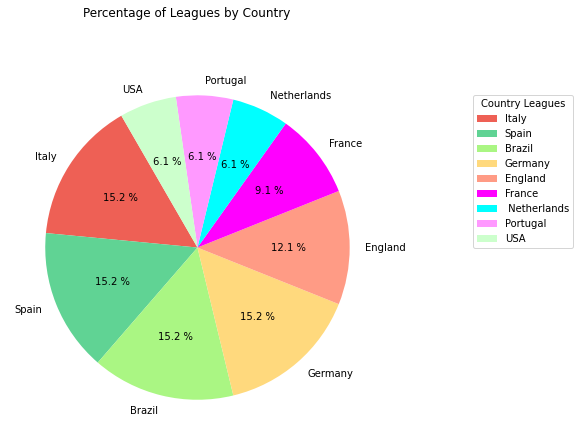

In [ ]:
# Percentage of Leagues by country

# DATA
league_country = round(scorers['Country'].value_counts(normalize = True)*100, 2)
league_country_values = league_country.values
league_country_index = league_country.index

# CHART
fig = plt.figure(figsize=(12,7))
colors = ['#EE6055','#60D394','#AAF683','#FFD97D','#FF9B85','#FF00FF','#00FFFF','#FF99FF','#CCFFCC']
plt.pie(league_country_values, labels= league_country_index, startangle=120, autopct= '%0.1f %%', colors = colors)
plt.legend(title = 'Country Leagues', loc = 'right', bbox_to_anchor = (1.5, 0.7))
plt.suptitle('Percentage of Leagues by Country')
plt.show()

**OBSERVATIONS**

+ Before starting with the samplings, it is interesting to see the % of leagues that exist depending on the country in which players are played. In this way we will be able to see the changes that occur in the sampling and the repercussions that one type of sampling or another may have.

+ In general, we observe how, for our DataFrame, the scorers play in the German, Italian, Spanish and Brazilian leagues, prevailing over the rest.Portuguese, USA and Netherlands leagues have the lowest levels of important forwards. 


### **SIMPLE RANDOM SAMPLE**

* The objective of this sampling method is to make a sample with **n** observations that we ourselves decide (randomly). The positive thing about this sampling is that each observation has the same chance of being selected.



In [ ]:
# Simple Random Sample

simple_random_sample = scorers.sample(n = 200)
simple_random_sample.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
599,France,France Ligue 7,(LEN),Gael Kakuta,10,1,786,5,4.14,0.50,18,6,2.18,0.73,2020
312,USA,MLS,(TOR),Alejandro Pozuelo,32,2,3104,14,9.80,0.30,84,38,2.57,1.16,2019
82,Brazil,Campeonato Brasileiro SÃ©rie A,NaN,Robinho,26,4,2234,12,8.00,0.34,49,22,2.08,0.94,2016
89,Brazil,Campeonato Brasileiro SÃ©rie A,NaN,Grafite,29,2,2511,13,14.01,0.53,64,34,2.42,1.29,2016
192,Spain,La Liga,(SOC),Mikel Oyarzabal,36,1,3300,13,11.12,0.32,66,28,1.90,0.81,2018


In [ ]:
# Shape. 200 rows and 15 columns

simple_random_sample.shape

(200, 15)

In [ ]:
# Comparison between means

scorers_mean = round(scorers.Goals.mean(),2) # Original DataSet
simple_random_sample_mean = round(simple_random_sample.Goals.mean(),2) # SRS DataSet
print (f'Original Mean is: {scorers_mean}\nSimple Random Sample Mean is: {simple_random_sample_mean}\n')

# Relative Error
relative_error_mean_1 = round((abs((scorers_mean-simple_random_sample_mean))/simple_random_sample_mean)*100, 3)
print(f'Relative error of the averages is: {relative_error_mean_1}%')

Original Mean is: 11.78
Simple Random Sample Mean is: 11.84

Relative error of the averages is: 0.507%


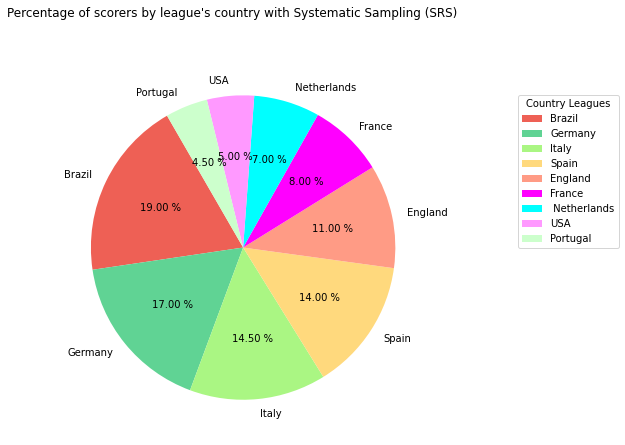

In [ ]:
# Now we can contrast the differences that SRS has with the original one

# DATA
league_country_srs = round(simple_random_sample['Country'].value_counts(normalize = True)*100, 2)
league_country_values_srs = league_country_srs.values
league_country_index_srs = league_country_srs.index

# CHART
fig = plt.figure(figsize=(12,7))
colors = ['#EE6055','#60D394','#AAF683','#FFD97D','#FF9B85','#FF00FF','#00FFFF','#FF99FF','#CCFFCC']
plt.pie(league_country_values_srs, labels= league_country_index_srs, startangle=120, autopct= '%0.2f %%', colors = colors)
plt.legend(title = 'Country Leagues', loc = 'right', bbox_to_anchor = (1.5, 0.7))
plt.suptitle('Percentage of scorers by league\'s country with Systematic Sampling (SRS)')
plt.show()

**OBSERVATIONS**

+ We can see how the pecentage have changed after apply sampling by SRS:

 + The main league scorers remain the same as for the original DataFrame; Germany, Italy, Spain and England but with different weights except the Brazil league that has gained more weight after applying the sampling.

  + Leagues with fewer scorers remain the same as in the original DatFrame but with different weights.

+ We can see how the means have not changed much after applying the sampling. We can see at a glance how all the countries are represented in the DataFrame and with weights similar to the original. Therefore, the bias is low with this method of sampling.

In [ ]:
# Save SRS.

simple_random_sample.to_csv('/content/drive/MyDrive/IT Academy - Data Science/Sprint 6. Mètodes de Mostreig/S06 T01 Tasca mètodes de mostreig/Samples/Simple_Random_Sample.csv')

### **SYSTEMATIC SAMPLING**

The first individual is randomly chosen and then the others are selected using a fixed sampling interval.


In [ ]:
# Systematic Sampling 

start_step = np.random.randint(0,10) # The sampling start (number between 0-10)
step = len(scorers)/220 # We decide the number (110)

# Create a function that returns a systematic sample

def systematic_sampling(data_frame, start_step, step):

  indexes = np.arange(start_step, len(scorers), step = step)
  systematic_sample = scorers.iloc[indexes] # Return the Dataframe with the indexes introduced
  return systematic_sample

systematic_sample = systematic_sampling(scorers, start_step, step)
systematic_sample.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
7,Spain,La Liga,(PSG),Neymar,30,0,2694,13,13.33,0.47,105,42,3.70,1.48,2016
10,Spain,La Liga,NaN,Aduriz,27,5,2480,16,15.92,0.61,85,45,3.26,1.72,2016
13,Spain,La Liga,(VIL),Gerard Moreno,37,0,3361,13,8.49,0.24,82,32,2.32,0.90,2016
16,Spain,La Liga,(SOC),Willian Jose,27,1,2102,12,8.41,0.38,69,29,3.12,1.31,2016


**METHODOLOGY APPLIED**

+ We have created a random number between 0-10 to choose the first observation / individual. Then we create a fixed interval based on the total number of observations we have and since we have 660 observations we have chosen the number 110. So that line break occurs every 6 observations / individuals until we reach the end of the DataFrame. That is, 660/110 = 6.



In [ ]:
# Shape. 228 rows and 15 columns
systematic_sample.shape

(219, 15)

In [ ]:
# Comparison between means

systematic_sample_mean = round(systematic_sample.Goals.mean(),2) # Systematic mean
print (f'Original Mean is: {scorers_mean}\nSimple Random Sample Mean is: {systematic_sample_mean}\n')

# Relative Error
relative_error_mean_2 = round((abs((scorers_mean-systematic_sample_mean))/systematic_sample_mean)*100, 3)
print(f'Relative error of the averages is: {relative_error_mean_2}%')

Original Mean is: 11.78
Simple Random Sample Mean is: 11.3

Relative error of the averages is: 4.248%


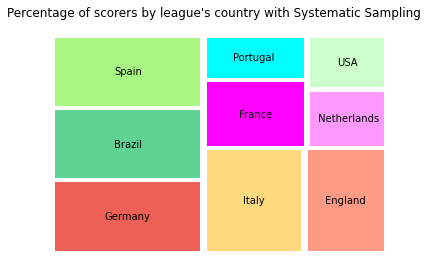

In [ ]:
# Now we can contrast the differences that Systematic Sampling has with the original one

import squarify

# DATA
league_country_ss = round(systematic_sample['Country'].value_counts(normalize=True)*100,2)
league_country_values_ss = league_country_ss.values
league_country_index_ss = league_country_ss.index

# CHART
colors = ['#EE6055','#60D394','#AAF683','#FFD97D','#FF9B85','#FF00FF','#00FFFF','#FF99FF','#CCFFCC']
squarify.plot(sizes = league_country_values_ss, label = league_country_index_ss, alpha = 1.0, color= colors, pad = True)
plt.axis('off')
plt.suptitle('Percentage of scorers by league\'s country with Systematic Sampling')
plt.show()

**OBSERVATIONS**

+ We can see how has changed the final result after applying systematic sampling:

    + We can see how the scorers of the large European leagues by countries including Brazil remain very similar to the original Dataframe after applying systematic sampling. In any case, France and England has incresead his %.

    + Likewise, players from countries with fewer scorers remain very similar to the original Dataframe, with the percentages varying very little.

+ In our exercise in particular, it seems that bias is relative low in the sampling, but it could be the case that there is an underlying pattern from which bias can lead.


In [ ]:
# Save Systematic Sample

systematic_sample.to_csv('/content/drive/MyDrive/IT Academy - Data Science/Sprint 6. Mètodes de Mostreig/S06 T01 Tasca mètodes de mostreig/Samples/Systematic_Sample.csv')

## **EXERCISE 2**

**STATEMENT:** Continues with the sports theme data set and generates a stratified sample and a sample using SMOTE (Synthetic Minority Oversampling Technique).

### **STRATIFIED SAMPLE**

+ To apply stratified sampling it is important to divide the population into subgroups based on some characteristic. For example, for our DataFrame we can divide it by the country where the leagues are played. In our case we have data divergences for each country, in case we had the same number of observations for each country it would not make sense to apply the stratified sampling, since we are interested in achieving a sample where each group is represented in the same proportion as the others.

**Link method 1:** https://www.geeksforgeeks.org/stratified-sampling-in-pandas/

**Link method 2:** https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# We divide by country

print(scorers.Country.unique(),'\n\n',scorers.Country.value_counts())

['Spain' 'Italy' 'Germany' 'England' 'Brazil' 'France' 'USA' 'Portugal '
 ' Netherlands'] 

 Italy           100
Spain           100
Brazil          100
Germany         100
England          80
France           60
 Netherlands     40
Portugal         40
USA              40
Name: Country, dtype: int64


**OBSERVATIONS**

+ Espanya has 100 scorers belonging to the Spanish leagues
+ Germany has 100 scorers from the German leagues
+ Brazil has 100 scorers belonging to the Brazilian leagues
+ Italy has 100 scorers belonging to the Italian leagues
+ England has 80 scorers from the English leagues
+ France has 60 scorers from the French leagues
+ Netherlands has 40 scorers from the Dutch leagues
+ USA has 40 top scorers from the North American leagues
+ Portugal has 40 scorers belonging to the Portuguese leagues

In [ ]:
# Stratified Sample

stratified_sample = scorers.groupby('Country', group_keys=False).apply(lambda x: x.sample(frac = 0.6))
stratified_sample.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
497,Netherlands,Eredivisie,(HER),Rai Vloet,10,0,853,7,4.49,0.50,21,9,2.34,1.00,2019
641,Netherlands,Eredivisie,(AZA),Teun Koopmeiners,25,0,2336,11,9.34,0.38,35,18,1.42,0.73,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
654,Netherlands,Eredivisie,(RZA),Haris Vuckic,23,2,2194,11,6.00,0.26,38,17,1.65,0.74,2020
640,Netherlands,Eredivisie,(MNU),Donny van de Beek,22,1,2023,8,4.90,0.23,44,16,2.07,0.75,2020


In [ ]:
# Shape. 396 rows and 15 columns

stratified_sample.shape

(396, 15)

In [ ]:
# METHOD 1

# We have kept the proportions of the original dataframe

print(stratified_sample.Country.unique(),'\n\n',stratified_sample.Country.value_counts())

[' Netherlands' 'Brazil' 'England' 'France' 'Germany' 'Italy' 'Portugal '
 'Spain' 'USA'] 

 Spain           60
Italy           60
Brazil          60
Germany         60
England         48
France          36
Portugal        24
 Netherlands    24
USA             24
Name: Country, dtype: int64


+ What we have done in stratified sampling dividing the Dataframe by stratums (countries of the leagues where the players play) and then make a sample with 60% of observations on the original dataframe. As a result, we obtain the same proportions on the original dataframe, thereby achieving that all groups are represented in the sample. 

In [ ]:
# Comparison between means

stratified_sample_mean = round(stratified_sample.Goals.mean(),2) # Sstratified mean
print (f'Original Mean is: {scorers_mean}\nSimple Random Sample Mean is: {stratified_sample_mean}\n')

# Relative Error
relative_error_mean_3 = round((abs((scorers_mean-stratified_sample_mean))/stratified_sample_mean)*100, 3)
print(f'Relative error of the averages is: {relative_error_mean_3}%')

Original Mean is: 11.78
Simple Random Sample Mean is: 11.69

Relative error of the averages is: 0.77%


In [ ]:
# Method 2

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(scorers, test_size= 0.4, stratify=scorers[['Country']])
X_train.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
32,Italy,Serie A,(ROM),Edin Dzeko,33,4,3194,29,30.60,0.91,178,99,5.29,2.94,2016
56,Germany,Bundesliga,(UNB),Max Kruse,23,0,2121,15,8.48,0.38,41,28,1.84,1.25,2016
443,England,Premier League,(LEI),Jamie Vardy,34,1,3271,23,19.28,0.56,89,42,2.58,1.22,2019
603,England,Premier League,(CHE),Timo Werner,10,0,876,4,3.69,0.40,23,10,2.49,1.08,2020
370,Portugal,Primeira Liga,(MAR),Rodrigo Pinho,18,9,1732,9,6.56,0.36,48,22,2.63,1.21,2019


In [ ]:
# Shape. 396 rows and 15 columns

X_train.shape

(396, 15)

In [ ]:
# We have kept the proportions of the original dataframe too.

print(X_train.Country.unique(),'\n\n',X_train.Country.value_counts())

['Italy' 'Germany' 'England' 'Portugal ' 'Spain' ' Netherlands' 'France'
 'USA' 'Brazil'] 

 Spain           60
Italy           60
Brazil          60
Germany         60
England         48
France          36
Portugal        24
 Netherlands    24
USA             24
Name: Country, dtype: int64


In [ ]:
# Comparison between means

X_train_mean = round(X_train.Goals.mean(),2) # Sstratified mean
print (f'Original Mean is: {scorers_mean}\nSimple Random Sample Mean is: {X_train_mean}\n')

# Dispersion of the averages
relative_error_mean_4 = round((abs((X_train_mean-scorers_mean))/X_train_mean)*100, 3)
print(f'Relative errror of the averages is: {relative_error_mean_4}%')

Original Mean is: 11.78
Simple Random Sample Mean is: 11.59

Relative errror of the averages is: 1.639%


In [ ]:
# Save Stratified Sample

X_train.to_csv('/content/drive/MyDrive/IT Academy - Data Science/Sprint 6. Mètodes de Mostreig/S06 T01 Tasca mètodes de mostreig/Samples/Stratified_Sample.csv')

### **SMOTE (Synthetic Minority Oversampling Technique)**

+ We are going to do a resampling. A resampling basically consists of eliminating observations from the majority sample (subsampling) or adding observations from the majority sample (oversampling).

+ Our exercise in particular asks us to perform an oversampling with the **SMOTE** technique

In [ ]:
# Import SMOTE from imblean

from imblearn.over_sampling import SMOTE

+ We want to apply the SMOTE on the countries of the leagues where soccer players play, by applying the oversampling technique.

**Link:** https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html


In [ ]:
scorers.Country.value_counts()

Italy           100
Spain           100
Brazil          100
Germany         100
England          80
France           60
 Netherlands     40
Portugal         40
USA              40
Name: Country, dtype: int64

In [ ]:
# SMOTE

# Drop string variables
smote_oversample = scorers.drop( columns=['League','Club','Player Names'])

# Convert Country column to numbers
dictionary ={'Italy': 1, 'Brazil': 3,'Spain': 0,'Germany': 2,'England': 4,'France': 5,' Netherlands': 6,'Portugal ': 7,'USA': 8}
smote_oversample['Country'] = smote_oversample['Country'].map(dictionary).fillna(smote_oversample['Country'])
smote_oversample.head(2)

,Country,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,0,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,0,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016


**VALUES:**

**Link:** https://www.it-swarm-es.com/es/python/convertir-no-y-si-en-0-y-1-en-pandas-dataframe/805909417/

+ **Spain:** 0

+ **Italy:** 1

+ **Germany:** 2

+ **Brazil:** 3

+ **England:** 4

+ **France:** 5

+ **Netherlands:** 6

+ **Portugal:** 7

+ **USA:** 8

+ Our objective is all classes have the same observations. To achieve that we have to apply SMOTE to those observations than have less observations than the rest.

In [ ]:
# SMOTE application

smote = SMOTE(sampling_strategy='not majority', random_state=48265148, k_neighbors=4)
smote_df, smote_country = smote.fit_resample(smote_oversample, smote_oversample[['Country']] )

smote_df.head()

,Country,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,0,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,0,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,0,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,0,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,0,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [ ]:
# Shape. 900 rows and 12 columns

smote_df.shape

(900, 12)

In [ ]:
# All classes have the same observations

smote_df.Country.value_counts()

8    100
7    100
6    100
5    100
4    100
3    100
2    100
1    100
0    100
Name: Country, dtype: int64

In [ ]:
# Comparison between means

smote_mean = round(smote_df.Goals.mean(),2) # Sstratified mean
print (f'Original Mean is: {scorers_mean}\nSimple Random Sample Mean is: {smote_mean}\n')

# Relative Error
relative_error_mean_5 = round((abs((scorers_mean-smote_mean))/smote_mean)*100, 3)
print(f'Relative error of the averages is: {relative_error_mean_5}%')

Original Mean is: 11.78
Simple Random Sample Mean is: 11.25

Relative error of the averages is: 4.711%


In [ ]:
# Save SMOTE Sampling

smote_df.to_csv('/content/drive/MyDrive/IT Academy - Data Science/Sprint 6. Mètodes de Mostreig/S06 T01 Tasca mètodes de mostreig/Samples/SMOTE Sampling.csv')

**METHODOLOGY APPLIED**

+ The objective of SMOTE sampling is to ensure that all classes have the same number of observations. We have observed which classes are the ones that needed to be filled at the levels of the others and we have proceeded to resampling.

+ The **sampling strategy** has been 'no majority', which means that all classes have been resampled except for the majority class, which in our case there were 4 classes with the maximum number of observations (100).

+ The **k-neighbors** are the number of closest neighbors used to construct the synthetic samples of those minority classes.

+ The **fit_resample** The function is to sample the dataset that we have introduced.

## **EXERCISE 3**

**STATEMENT:** Continues with the sports theme dataset and generates a sample using the Reservoir sampling method.



### **RESERVOIR SAMPLING**

+ Reservoir sampling is carried out when we have a DataSet of a very large length (n) and that is unknown on which we can only iterate once.

+ The objective of this sampling is to create a sample and each observation has the same probability of being chosen.

In [ ]:
# Reservoir Sampling

import random
def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

stream = generator(len(scorers))
k=100
reservoir = []

for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
             reservoir[random.choice(range(0,k))] = element




In [ ]:
# With the numbers from the 'reservoir' list we call the original dataframe again to create the reservoir sampling as a Dataframe

df = pd.read_csv('/content/drive/MyDrive/IT Academy - Data Science/Sprint 6. Mètodes de Mostreig/Statistics_Scorers.csv')

reservoir_sampling = df.iloc[reservoir]
reservoir_sampling.head()


,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
533,Spain,La Liga,(RMA),Federico Valverde,6,2,566,3,1.13,0.19,9,5,1.51,0.84,2020
385,Italy,Serie A,(JUV),Cristiano Ronaldo,33,0,3127,31,27.32,0.83,208,79,6.32,2.40,2019
213,Italy,Serie A,(CAG),Leonardo Pavoletti,31,1,2903,16,11.00,0.36,84,33,2.75,1.08,2018
172,Brazil,Campeonato Brasileiro SÃ©rie A,(FLA),Diego,24,3,2089,10,7.92,0.36,56,22,2.55,1.00,2017
218,Italy,Serie A,(PSG),Mauro Icardi,24,5,2314,11,14.86,0.61,73,29,3.00,1.19,2018


In [ ]:
# Shape. 100 rows and 15 columns
reservoir_sampling.shape

(100, 15)

In [ ]:
# Comparison between means

reservoir_sampling_mean = round(reservoir_sampling.Goals.mean(),2) # Sstratified mean
print (f'Original Mean is: {scorers_mean}\nSimple Random Sample Mean is: {reservoir_sampling_mean}\n')

# Relative Error
relative_error_mean_6 = round((abs((scorers_mean-reservoir_sampling_mean))/reservoir_sampling_mean)*100, 3)
print(f'Relative error of the averages is: {relative_error_mean_6}%')

Original Mean is: 11.78
Simple Random Sample Mean is: 11.57

Relative error of the averages is: 1.815%


In [ ]:
# Save Reservoir Sampling

reservoir_sampling.to_csv('/content/drive/MyDrive/IT Academy - Data Science/Sprint 6. Mètodes de Mostreig/S06 T01 Tasca mètodes de mostreig/Samples/Reservoir Sampling.csv')

**METHODOLOGY APPLIED**

+We have followed the following steps to carry out the Reservoir sampling method:

  + **1** We have created a function called 'generator' that receives the length of our DataFrame. The objective of this function is that all the rows of our DataFrame are iterated one by one until the end. The intention is that all the observations have the same possibility of being chosen.

  + **2** We initialise a **k** where we indicate the value we want our sample to have. In addition, we create a list called 'Reservoir' where these 100 observations will be entered.

  + **3** Then we initialize a **for loop**. The first 100 observations will be entered in the 'reservoir' list, subsequent observations must be subjected to a condition: if the randomly number created between 0-1 is less than the probability number created (between 0-1), then will introduce this observation to the 'reservoir' list by another observation that was already in the list, thanks to **random.choice**.

## **Samples Summary**

In [ ]:
# Sampling results

sampling_means = {'Sampling Mean': [simple_random_sample_mean, systematic_sample_mean, stratified_sample_mean, X_train_mean, smote_mean, reservoir_sampling_mean], 'Real Mean': scorers_mean}

# To Dataframe
sampling_means = pd.DataFrame(sampling_means, index=['Simple Random Sample', 'Systematic Sample', 'Stratified Sample (Method 1)', 'Stratified Sample (Method 2)', 'SMOTE Sample', 'Reservoir Sample'])

# Adding Absolut Error
sampling_means['Absolut Error'] = abs((sampling_means['Real Mean'] - sampling_means['Sampling Mean'])) # abs retun the absolut value
sampling_means 


,Sampling Mean,Real Mean,Absolut Error
Simple Random Sample,11.84,11.78,0.06
Systematic Sample,11.30,11.78,0.48
Stratified Sample (Method 1),11.69,11.78,0.09
Stratified Sample (Method 2),11.59,11.78,0.19
SMOTE Sample,11.25,11.78,0.53
Reservoir Sample,11.57,11.78,0.21


+ The means furthest from the real mean are the **Systematic Sample** and **SMOTE Sample**. 